<a href="https://colab.research.google.com/github/CipluxX/Aplikasi-Regresi-untuk-Pemecahan-Problem/blob/main/Aplikasi_Regresi_untuk_Pemecahan_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Student_Performance.csv to Student_Performance (3).csv


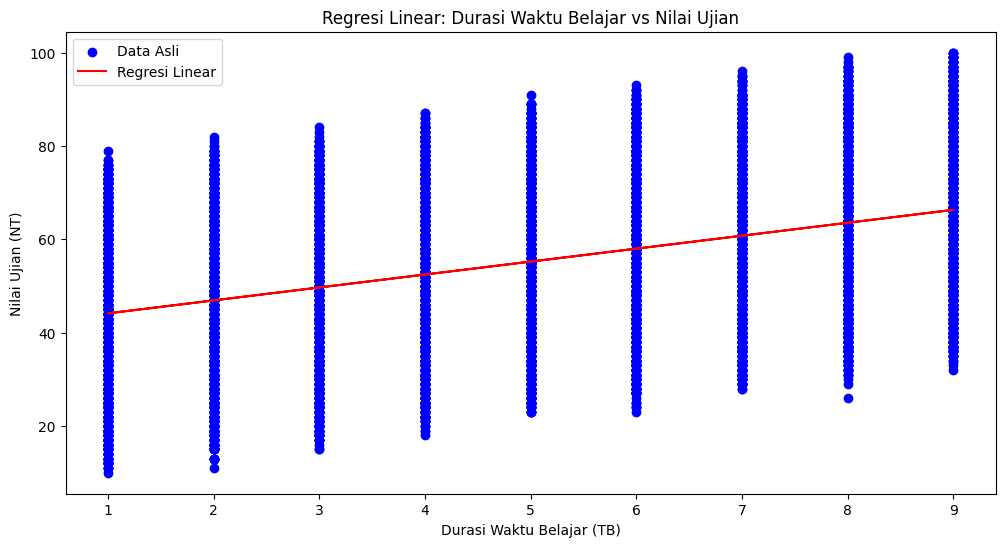

Galat RMS (Model Linear): 17.819474832547773


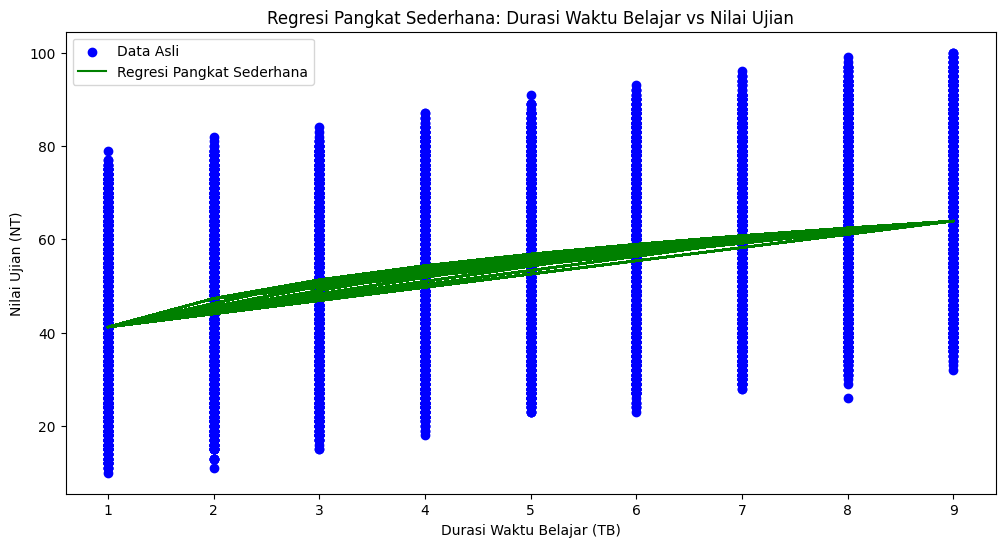

Galat RMS (Model Pangkat Sederhana): 17.886378846062684


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from google.colab import files

# Unggah file CSV
uploaded = files.upload()

# Baca data dari file CSV yang diunggah
data = pd.read_csv(next(iter(uploaded)))

# Ambil kolom 'Hours Studied' (TB) dan 'Performance Index' (NT)
TB = data['Hours Studied'].values.reshape(-1, 1)
NT = data['Performance Index'].values

# Metode 1: Model Linear
linear_model = LinearRegression()
linear_model.fit(TB, NT)
NT_pred_linear = linear_model.predict(TB)

# Plot hasil regresi linear
plt.figure(figsize=(12, 6))
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear: Durasi Waktu Belajar vs Nilai Ujian')
plt.legend()
plt.show()

# Hitung galat RMS untuk model linear
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
print(f'Galat RMS (Model Linear): {rms_linear}')

# Metode 2: Model Pangkat Sederhana
def power_law(x, a, b):
    return a * np.power(x, b)

params_power, covariance_power = curve_fit(power_law, TB.flatten(), NT)
NT_pred_power = power_law(TB, *params_power)

# Plot hasil regresi pangkat sederhana
plt.figure(figsize=(12, 6))
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_power, color='green', label='Regresi Pangkat Sederhana')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Pangkat Sederhana: Durasi Waktu Belajar vs Nilai Ujian')
plt.legend()
plt.show()

# Hitung galat RMS untuk model pangkat sederhana
rms_power = np.sqrt(mean_squared_error(NT, NT_pred_power))
print(f'Galat RMS (Model Pangkat Sederhana): {rms_power}')
